# Estimating Economic Growth using Deep Learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [2]:
data = pd.read_csv('data_final.csv')
data

,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,age_dependency_ratio,food_production_index,human_capital_index,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita
0,-1.413012e+08,5.286567e+08,9.373500,5573458.0,120.4,3524.25,1.141082e+08,103.671183,95.55,0.437499,...,20.465000,19.255000,22600770.0,71.356713,46.901,11.048,744193.00,1.566430e+09,9.655434e+08,179.426611
1,-2.309113e+08,4.918790e+08,9.919000,5886907.0,116.3,3023.20,1.855064e+08,102.663238,98.77,0.437499,...,19.760000,18.000000,23680871.0,67.580448,46.231,10.704,-20393.25,1.689670e+09,1.025522e+09,190.683814
2,-2.307150e+08,7.126885e+08,8.830000,6198355.0,112.1,4244.00,1.846862e+08,101.562371,96.05,0.437499,...,19.091144,18.963333,24726684.0,65.520050,45.507,10.356,-105319.20,1.553454e+09,1.370816e+09,211.382117
3,-2.356262e+08,9.238376e+08,5.750358,6483460.0,107.9,2675.60,1.976982e+08,100.349127,106.32,0.437499,...,21.744152,0.000000,25654277.0,60.358543,44.723,10.003,-196449.50,1.931964e+09,1.664800e+09,242.031285
4,-1.792178e+08,8.660660e+08,6.204500,6644359.0,103.7,2833.15,1.856889e+08,100.970943,97.63,0.433682,...,22.674953,0.000000,26433049.0,56.860597,43.870,9.645,-109034.15,1.996295e+09,1.966653e+09,263.733692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,-3.443000e+08,-3.479166e+08,5.370000,6194591.0,81.4,8541.00,2.311408e+08,81.230012,88.43,0.456140,...,23.640000,20.000000,12894316.0,83.582710,36.526,12.384,-129648.85,1.222053e+09,3.062978e+09,1093.654002
4960,-3.498500e+08,-2.406172e+09,14.496500,6285545.0,73.8,9491.00,2.846143e+08,81.775797,94.08,0.463222,...,15.200000,19.800000,13115131.0,76.182669,36.292,11.167,-622997.00,1.376807e+09,4.335296e+09,1304.969802
4961,-3.730500e+08,-9.432642e+08,13.044500,6385796.0,67.8,9782.00,3.287764e+08,82.350264,92.05,0.462221,...,21.990000,19.600000,13350356.0,77.746301,35.768,10.115,-123286.35,1.363954e+09,4.543589e+09,1430.000818
4962,-4.728000e+08,-5.911380e+08,4.770000,6486791.0,64.4,9465.00,3.369867e+08,82.840045,91.23,0.462221,...,14.700000,17.700000,13586681.0,88.693420,34.978,9.277,-123286.35,1.704942e+09,4.624054e+09,1434.899340


## Splitting the data into training and validation data

In [3]:
X = data.drop('gdp_per_capita', axis=1)
y = data.gdp_per_capita

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Building the Deep Learning model

In [5]:
input_shape = [X_train.shape[1]]

In [6]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [7]:
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=opt,
    loss='mae',
)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.1,
    patience=20,
    restore_best_weights=True,
)

## Training the model

=======] - 0s 5ms/step - loss: 4861.0357 - val_loss: 5134.3413
Epoch 186/400
32/32 [==============================] - 0s 6ms/step - loss: 4865.5768 - val_loss: 5050.6450
Epoch 187/400
32/32 [==============================] - 0s 5ms/step - loss: 5104.5970 - val_loss: 5133.2002
Epoch 188/400
32/32 [==============================] - 0s 6ms/step - loss: 4772.1575 - val_loss: 4726.9419
Epoch 189/400
32/32 [==============================] - 0s 5ms/step - loss: 4838.4274 - val_loss: 4729.9810
Epoch 190/400
32/32 [==============================] - 0s 5ms/step - loss: 4857.6785 - val_loss: 4761.3623
Epoch 191/400
32/32 [==============================] - 0s 6ms/step - loss: 4872.8358 - val_loss: 4799.2012
Epoch 192/400
32/32 [==============================] - 0s 5ms/step - loss: 4688.8812 - val_loss: 4980.9663
Epoch 193/400
32/32 [==============================] - 0s 6ms/step - loss: 4627.3924 - val_loss: 4986.4473
Epoch 194/400
32/32 [==============================] - 0s 5ms/step - loss: 4376.2

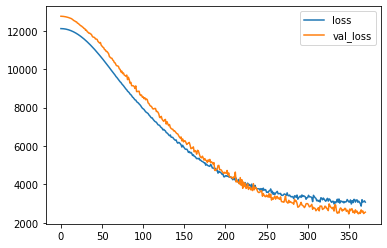

In [8]:
epochs = 400
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=epochs,
    callbacks=[early_stopping],
    verbose=1,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

## Testing the model

In [9]:
test_loss = model.evaluate(
    X_test, y_test,
    verbose=0,
)

print('Mean Absolute Error:', test_loss)

Mean Absolute Error: 2334.944091796875
